In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import writers

In [8]:
def InputLivingCells(living_cells = 33, rows = 10, columns = 10, random = False):
    cells_positions = []
    if random:
        cells_positions = [[np.random.randint(0, rows), np.random.randint(0, columns)] for i in range(living_cells)]
    else:
        for i in range(living_cells):
            print(f'cell {i} row?')
            cell_row = input()
            print(f'cell {i} column?')
            cell_col = input()
            cells_positions += [[int(cell_row), int(cell_col)]]
    cells_grid = pd.DataFrame(np.zeros((rows, columns)))
    for x, y in cells_positions:
        cells_grid.iloc[x, y] = 1
    return cells_grid

In [9]:
df = InputLivingCells(random = True)
df

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [51]:
def LifeCycle(cells_grid, cycles = 0):
    n, m = cells_grid.shape
    sorounding = [[-1, -1], [-1, 0], [-1, 1],
                  [0, -1], [0, 1],
                  [1, -1], [1, 0], [1, 1]]
    
    neighbors_grid = pd.DataFrame(np.zeros((n, m)))
    for x in range(n):
        for y in range(m):
            neighbors = 0
            for x2, y2 in sorounding:
                xn = x + x2
                yn = y + y2
                if xn < 0 or yn < 0:
                    neighbors += 0
                else:
                    try:
                        neighbors += cells_grid.iloc[x + x2, y + y2]
                    except Exception:
                        neighbors += 0
            neighbors_grid.iloc[x, y] = neighbors
    
    final_grid = pd.DataFrame(np.zeros((n, m)))
    for x in range(n):
        for y in range(m):
            cell_value = cells_grid.iloc[x, y] 
            neighbor_value = neighbors_grid.iloc[x, y]
            if (cell_value == 1) and ((neighbor_value < 2) or (neighbor_value > 3)):
                final_grid.iloc[x, y] = 0
            elif (cell_value == 0) and (neighbor_value == 3):
                final_grid.iloc[x, y] = 1
            else:
                final_grid.iloc[x, y] = cells_grid.iloc[x, y]
    if cycles:
        cells_cycles = [cells_grid, final_grid]
        for i in range(cycles):
            cells_cycles += [LifeCycle(final_grid)]
            final_grid = cells_cycles[-1]
        return cells_cycles
    
    return final_grid
            

<IPython.core.display.Javascript object>


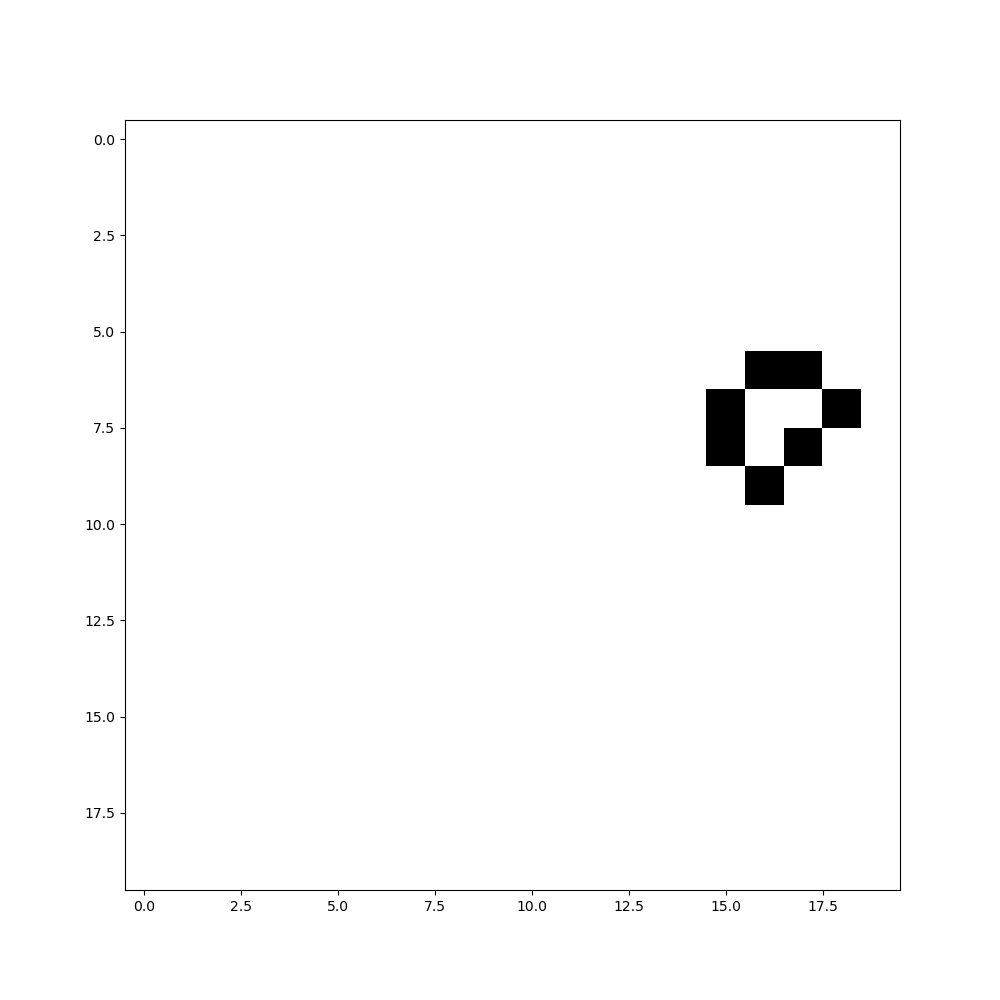

......Done!


In [62]:
fps = 15
nSeconds = 5
frames = fps * nSeconds
snapshots = LifeCycle(InputLivingCells(living_cells = 200, rows = 20, columns = 20, random = True), cycles = frames)
Writer = writers['ffmpeg']
writer = Writer(fps = fps, metadata = dict(artist = 'Me'), bitrate = 1800)
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize = (10, 10))

a = snapshots[0]
im = plt.imshow(a, cmap = 'binary', interpolation='none', aspect='auto', vmin=0, vmax=1)

def animate(i):
    if i % fps == 0:
        print( '.', end ='' )
    im.set_array(snapshots[i])
    return [im]

anim = animation.FuncAnimation(fig, animate, frames = frames, interval = 1000 / fps, blit = True, repeat = True)

anim.save('GameOfLife.mp4', writer = writer)# extra_args=['-vcodec', 'libx264'])

print('Done!')